# Preprocessing

In [1]:
# Import librries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the name of columns
cols_name = ['age','workclass', 'fnlwgt','education','education-num', 'marital-status', 'occupation', 'relationship', 'race',
        'sex', 'capital-gain' , 'capital-loss', 'hours-per-week', 'native-country', 'target']
#Load train data
train = pd.read_csv('adult.data', na_values='?',  index_col=False , skipinitialspace= True,
                    header=None, names=cols_name)
# print sample of train data
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Laod test data
test = pd.read_csv('adult.test',  na_values='?', skipinitialspace= True, index_col=False , 
                   header=None, names=cols_name, skiprows=1)
# print sample of test data
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


### Filling Missing values

In [4]:
train_data = train.copy()
test_data = test.copy()

In [5]:
idx = train_data[train_data['workclass'] == 'Never-worked']['occupation'].index
train_data.loc[idx,'occupation'] = 'No-occupation'

idx = test_data[test_data['workclass'] == 'Never-worked']['occupation'].index
test_data.loc[idx,'occupation'] = 'No-occupation'

In [6]:
train_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [7]:
# filling missing values with 'Missing' in this way new category will create 
train_data.fillna('Missing', inplace = True)
test_data.fillna('Missing', inplace = True)

### Handeling outliers

In [8]:
num_cols = [x for x in train.columns if train[x].dtype != 'O']
cat_cols = [x for x in train.columns if train[x].dtype == 'O']
print('Numerical columns:   ', num_cols)
print('Categorical columns: ',cat_cols)

Numerical columns:    ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'target']


**most of the value of capital-gain and capital-loss columns are zero and by outlier handling we will loss some important information then it will not perform on them, also the eduction-num is oordinal cateory data and it does not need to remove its outliers.**

In [9]:
def outliers_hadling(data, columns_name, q1_range= 0.25 , q3_range= 0.75):
    for col in columns_name :
        Q1 = data[col].quantile(q1_range)
        Q3 = data[col].quantile(q3_range)
        IQR = Q3 - Q1
        upper_limit=Q3 + (1.5 * IQR)
        lower_limit=Q1 - (1.5 * IQR)
        data.loc[data[col]<lower_limit,col]=lower_limit
        data.loc[data[col]>upper_limit,col]=upper_limit
    return data

In [10]:
train_data = outliers_hadling(train_data, ['age'])
train_data = outliers_hadling(train_data , ['hours-per-week'], 0.2 , 0.8)

test_data = outliers_hadling(test_data, ['age'])
test_data = outliers_hadling(test_data , ['hours-per-week'], 0.2 , 0.8)

Text(0.5, 1.0, 'Distribution of Train data')

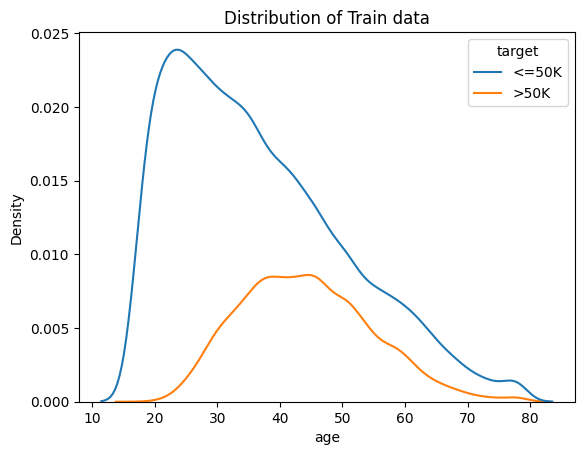

In [11]:
sns.kdeplot(data=train_data, x = 'age' , hue='target')
plt.title('Distribution of Train data')

Text(0.5, 1.0, 'Distribution of Test data')

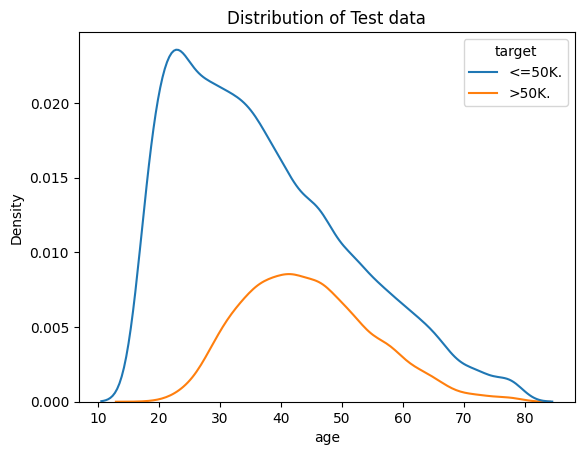

In [12]:
sns.kdeplot(data=test_data, x = 'age' , hue='target')
plt.title('Distribution of Test data')

Text(0.5, 1.0, 'Distribution of Train data')

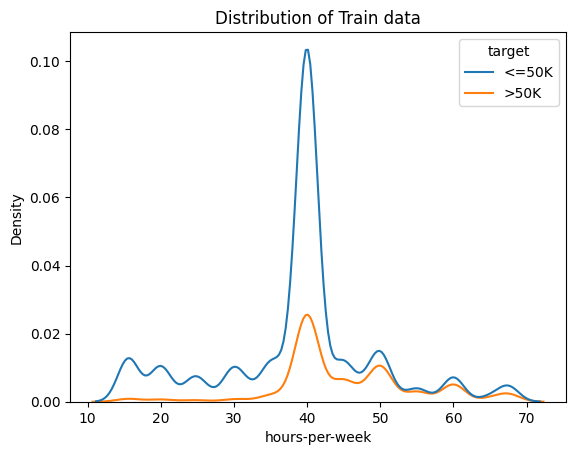

In [13]:
sns.kdeplot(data=train_data, x = 'hours-per-week' , hue='target')
plt.title('Distribution of Train data')

Text(0.5, 1.0, 'Distribution of Test data')

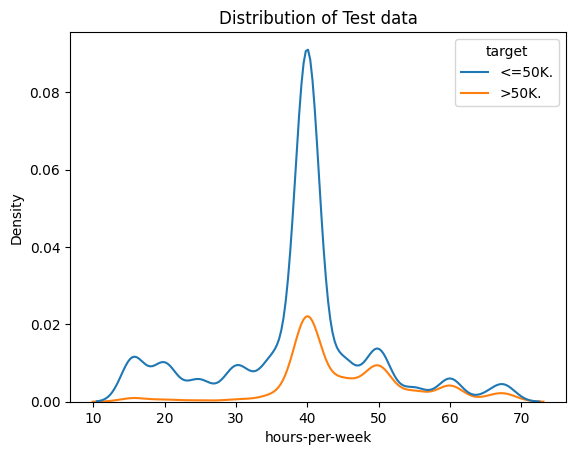

In [14]:
sns.kdeplot(data=test_data, x = 'hours-per-week' , hue='target')
plt.title('Distribution of Test data')

**Education nd education-num are same then we will drop education, native-country will drop because 89% of people are fron US then is will impact our predicion also fnlwgt will drop because it is final weights to keep all similar demographic in same wights which her is not useful**    

In [15]:
train_data.drop(['education', 'fnlwgt', 'native-country'], axis = 1 , inplace = True)
test_data.drop(['education', 'fnlwgt', 'native-country'], axis = 1 , inplace = True)

In [16]:
scale_num_cols =  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

### Scale numerical data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[scale_num_cols]= scaler.fit_transform(train_data[scale_num_cols])
test_data[scale_num_cols]= scaler.transform(test_data[scale_num_cols])

### Convert categorical data to numeric

In [18]:
# one hot encoding for columns with 2 categories
train_data['target'] = pd.get_dummies(train_data['target'], drop_first =True)
train_data['sex'] = pd.get_dummies(train_data['sex'], drop_first=True)

test_data['target'] = pd.get_dummies(test_data['target'], drop_first =True)
test_data['sex'] = pd.get_dummies(test_data['sex'], drop_first=True)

In [19]:
encod_cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']

In [20]:
#Use binary encoding for cells with more than 2 categooires then number of created feature will be less
encoder = ce.BinaryEncoder(cols= encod_cat_cols, drop_invariant=True)
train_data = encoder.fit_transform(train_data)
test_data = encoder.transform(test_data)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   workclass_1       32561 non-null  int64  
 1   workclass_2       32561 non-null  int64  
 2   workclass_3       32561 non-null  int64  
 3   workclass_4       32561 non-null  int64  
 4   marital-status_1  32561 non-null  int64  
 5   marital-status_2  32561 non-null  int64  
 6   marital-status_3  32561 non-null  int64  
 7   occupation_0      32561 non-null  int64  
 8   occupation_1      32561 non-null  int64  
 9   occupation_2      32561 non-null  int64  
 10  occupation_3      32561 non-null  int64  
 11  occupation_4      32561 non-null  int64  
 12  relationship_1    32561 non-null  int64  
 13  relationship_2    32561 non-null  int64  
 14  relationship_3    32561 non-null  int64  
 15  race_1            32561 non-null  int64  
 16  race_2            32561 non-null  int64 

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   workclass_1       16281 non-null  int64  
 1   workclass_2       16281 non-null  int64  
 2   workclass_3       16281 non-null  int64  
 3   workclass_4       16281 non-null  int64  
 4   marital-status_1  16281 non-null  int64  
 5   marital-status_2  16281 non-null  int64  
 6   marital-status_3  16281 non-null  int64  
 7   occupation_0      16281 non-null  int64  
 8   occupation_1      16281 non-null  int64  
 9   occupation_2      16281 non-null  int64  
 10  occupation_3      16281 non-null  int64  
 11  occupation_4      16281 non-null  int64  
 12  relationship_1    16281 non-null  int64  
 13  relationship_2    16281 non-null  int64  
 14  relationship_3    16281 non-null  int64  
 15  race_1            16281 non-null  int64  
 16  race_2            16281 non-null  int64 

### Save clean data into csv file

In [23]:
train_data.to_csv('clean_train_data.csv')
test_data.to_csv('clean_test_data.csv')

### Save clean data to mongodb and load it 

In [32]:
#!python -m pip install pymongo

In [54]:
client = pymongo.MongoClient("mongodb+srv://<user>:<pass>@cluster0.m03oxa5.mongodb.net/?retryWrites=true&w=majority")
db = client.census_cleandata

In [63]:
COLLECTION_NAME = "census_collection_train"
collection = db[COLLECTION_NAME]
rec_train = collection.insert_many(train_data.to_dict('records'))

In [64]:
COLLECTION_NAME = "census_collection_test"
collection = db[COLLECTION_NAME]
rec_test = collection.insert_many(test_data.to_dict('records'))

In [67]:
all_records = collection.find()
fetch_df = pd.DataFrame.from_dict(all_records)
fetch_df.head()

,_id,workclass_1,workclass_2,workclass_3,workclass_4,marital-status_1,marital-status_2,marital-status_3,occupation_0,occupation_1,...,race_1,race_2,race_3,age,education-num,sex,capital-gain,capital-loss,hours-per-week,target
0,63fcfb1d67c13b20a12107ed,0,0,1,1,0,0,1,0,1,...,0,1,0,0.131148,0.400000,1,0.000000,0.0,0.471154,0
1,63fcfb1d67c13b20a12107ee,0,0,1,1,0,1,0,0,1,...,0,0,1,0.344262,0.533333,1,0.000000,0.0,0.663462,0
2,63fcfb1d67c13b20a12107ef,0,1,0,1,0,1,0,0,1,...,0,0,1,0.180328,0.733333,1,0.000000,0.0,0.471154,1
3,63fcfb1d67c13b20a12107f0,0,0,1,1,0,1,0,0,1,...,0,1,0,0.442623,0.600000,1,0.076881,0.0,0.471154,1
4,63fcfb1d67c13b20a12107f1,0,1,1,0,0,0,1,0,1,...,0,0,1,0.016393,0.600000,0,0.000000,0.0,0.278846,0
